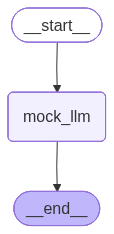

In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display
# creating a simple StateGraph
def mock_llm(state: MessagesState):
    return {"messages": [{"role": "ai", "content": "hello world"}]}

graph = StateGraph(MessagesState)

# building node
graph.add_node(mock_llm)
graph.add_edge(START, "mock_llm")
graph.add_edge("mock_llm", END)
graph = graph.compile()

graph.invoke({"messages": [{"role": "user", "content": "hi!"}]})
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
def read_csv(state: MessagesState):
    return {"messages": ["CSV file loaded successfully."]}

def check_duplicates(state: MessagesState):
    return {"messages": ["Checking for duplicate rows..."]}

def remove_duplicates(state: MessagesState):
    return {"messages": ["Duplicates found and removed."]}

def download_clean(state: MessagesState):
    return {
        "messages": [
            "Clean dataset is ready. Ask user before downloading."
        ]
    }

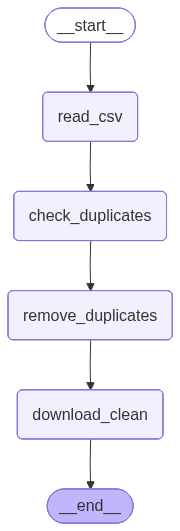

In [12]:
graph = StateGraph(MessagesState)

graph.add_node("read_csv", read_csv)
graph.add_node("check_duplicates", check_duplicates)
graph.add_node("remove_duplicates", remove_duplicates)
graph.add_node("download_clean", download_clean)

# 3️⃣ Define Flow
graph.add_edge(START, "read_csv")
graph.add_edge("read_csv", "check_duplicates")
graph.add_edge("check_duplicates", "remove_duplicates")
graph.add_edge("remove_duplicates", "download_clean")
graph.add_edge("download_clean", END)

graph=graph.compile()
graph